Анализ данных о пингвинах
Выполнил: Киреев Вячеслав
Дата: 26.08.2025
Инструменты: Python, Pandas, Seaborn, Matplotlib
ОБЗОР ДАТАСЕТА
Общая характеристика:
    Объем данных: 344 наблюдения
    Количество признаков: 9 характеристик
    Период наблюдений: 2007-2009 годы
Структура данных:
    id - идентификатор особи
    species - вид пингвина
    island - остров обитания
    bill_length_mm - длина клюва (мм)
    bill_depth_mm - глубина клюва (мм)
    flipper_length_mm - длина плавника (мм)
    body_mass_g - масса тела (г)
    sex - пол особи
    year - год наблюдения
ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
Стратегия заполнения пропусков:
    Категориальные данные (пол): заполнение модой (наиболее частым значением)
    Числовые данные (морфометрические показатели): заполнение медианой по столбцу
Результат:
    Полностью очищенный датасет без пропущенных значений
    Сохранение статистической целостности данных
СТАТИСТИЧЕСКАЯ СВОДКА
Ключевые метрики числовых признаков:
    Длина клюва: 43.9 ± 5.5 мм
    Глубина клюва: 17.2 ± 1.9 мм
    Длина плавника: 200.9 ± 14.1 мм
    Масса тела: 4201.8 ± 802.0 г
Примечание: значения представлены как среднее ± стандартное отклонение
МАТРИЦА КОРРЕЛЯЦИЙ
Положительные корреляции:
    Длина клюва и длина плавника (r = 0.66) - сильная связь
    Длина плавника и масса тела (r = 0.87) - очень сильная связь
Отрицательные корреляции:
    Глубина клюва и длина плавника (r = -0.58) - умеренная связь
    Глубина клюва и масса тела (r = -0.47) - умеренная связь
РАСПРЕДЕЛЕНИЕ ПО ВИДАМ
Видовой состав популяции:
    Адели (Adelie): 152 особи (44.2%)
    Субантарктический (Gentoo): 124 особи (36.0%)
    Антарктический (Chinstrap): 68 особей (19.8%)
РАСПРЕДЕЛЕНИЕ ПО ОСТРОВАМ
Географическое распределение:
    Остров Biscoe: 168 пингвинов (48.8%)
    Остров Dream: 124 пингвина (36.0%)
    Остров Torgersen: 52 пингвина (15.2%)
РАСПРЕДЕЛЕНИЕ ПО ПОЛУ
Половой состав:
    Самцы: 179 особей (52.0%)
    Самки: 165 особей (48.0%)
Соотношение: практически равномерное (1.08:1)
РАСПРЕДЕЛЕНИЕ ПО ГОДАМ
Динамика наблюдений:
    2009 год: 120 наблюдений (34.9%)
    2008 год: 114 наблюдений (33.1%)
    2007 год: 110 наблюдений (32.0%)
КЛЮЧЕВЫЕ ВЫВОДЫ
    Данные высокого качества после обработки пропусков
    Сбалансированное распределение по полу и годам
    Выявлены значимые корреляции между морфометрическими признаками
    Преобладают пингвины Адели в видовом составе
    Основное место обитания - остров Biscoe
ПЕРСПЕКТИВЫ ДАЛЬНЕЙШЕГО АНАЛИЗА
    Построение моделей машинного обучения для классификации видов
    Глубокий анализ морфологических различий между видами
    Исследование временных трендов и изменений популяции
    Пространственный анализ распределения по островам

1. Импортируем нужные библиотеки

In [395]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

2. ОБЗОР ДАТАСЕТА

In [398]:
df = pd.read_csv('penguins.csv')

In [400]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [404]:
df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [406]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [408]:
df.duplicated().sum()

0

In [410]:
print('Количество строк:', df.shape[0])

Количество строк: 344


In [412]:
print('Количество столбцов:', df.shape[1])

Количество столбцов: 9


3. ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

In [415]:
# Заполним пропуски наиболее часто встречающимся значением из столбца 'пол'
mode_value = df['sex'].mode()[0]
df.sex.fillna(mode_value, inplace = True)

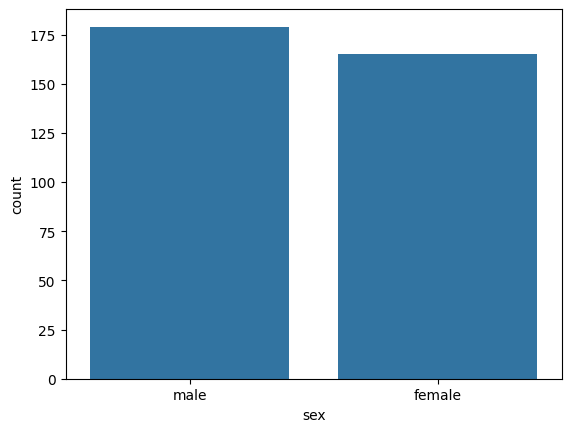

In [417]:
sns.countplot(df, x = 'sex')
plt.show()

In [419]:
#Заполним пропуски в числовых столбцах медианой
n_c =df.select_dtypes(include=['float64' , 'int64']).columns
for col in n_c:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace = True)

In [421]:
df.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [423]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,male,2007
4,4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,female,2007


4. МАТРИЦА КОРРЕЛЯЦИЙ

In [426]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()
correlation_matrix

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
id,1.000000,0.761484,-0.258242,0.453256,0.274288,0.339103
bill_length_mm,0.761484,1.000000,-0.235000,0.655858,0.594925,0.054285
bill_depth_mm,-0.258242,-0.235000,1.000000,-0.583832,-0.471942,-0.060105
flipper_length_mm,0.453256,0.655858,-0.583832,1.000000,0.871221,0.168954
body_mass_g,0.274288,0.594925,-0.471942,0.871221,1.000000,0.042060
year,0.339103,0.054285,-0.060105,0.168954,0.042060,1.000000


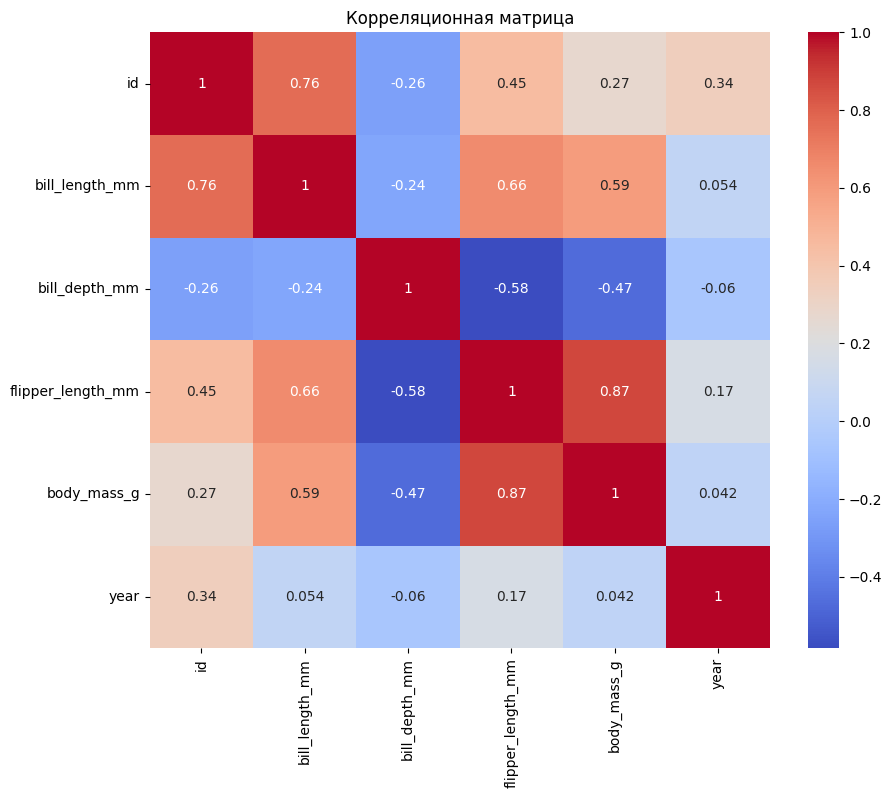

In [428]:
plt.figure(figsize =(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Корреляционная матрица')
plt.show()

5. РАСПРЕДЕЛЕНИЕ ПО ВИДАМ 

In [431]:
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

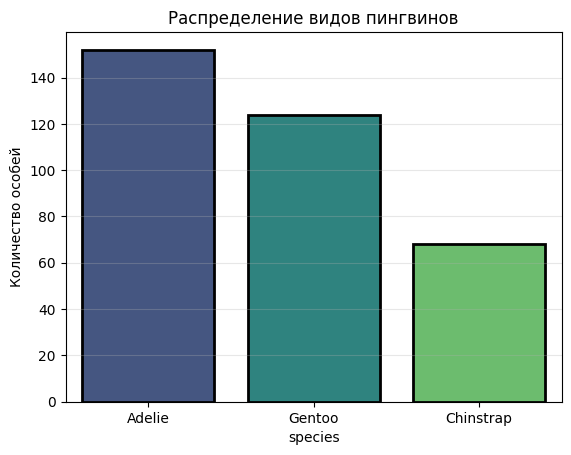

In [433]:
sns.countplot(df, x = 'species', palette = 'viridis', edgecolor = 'black', linewidth = 2, hue = 'species')
plt.title('Распределение видов пингвинов')
plt.ylabel('Количество особей')
plt.grid(axis = 'y', alpha = 0.3)
plt.show()

In [435]:
df.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

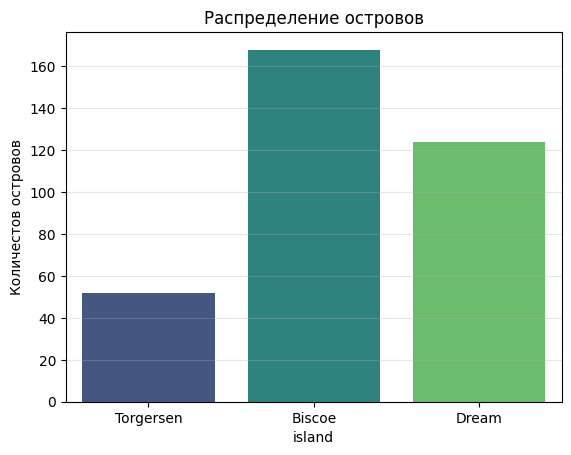

In [437]:
sns.countplot(df, x = 'island', hue = 'island', palette = 'viridis')
plt.title('Распределение островов')
plt.ylabel('Количестов островов')
plt.grid(axis = 'y', alpha = 0.3)
plt.show()

In [439]:
df.sex.value_counts()

sex
male      179
female    165
Name: count, dtype: int64

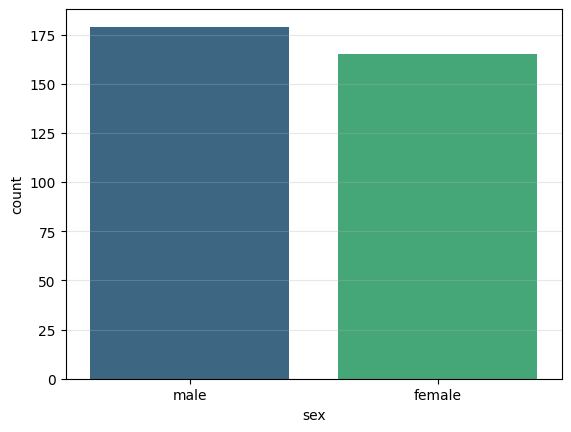

In [441]:
sns.countplot(df, x = 'sex', hue = 'sex', palette = 'viridis')
plt.grid(axis = 'y', alpha = 0.3)
plt.show()

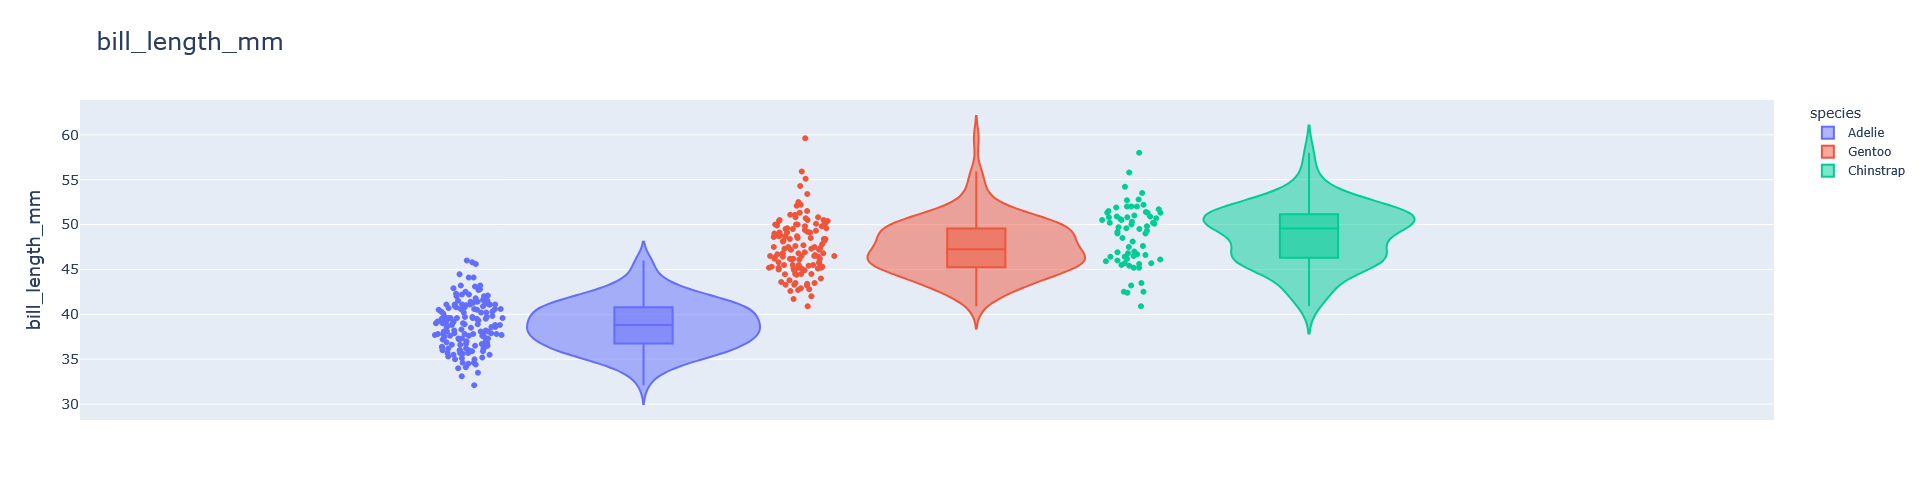

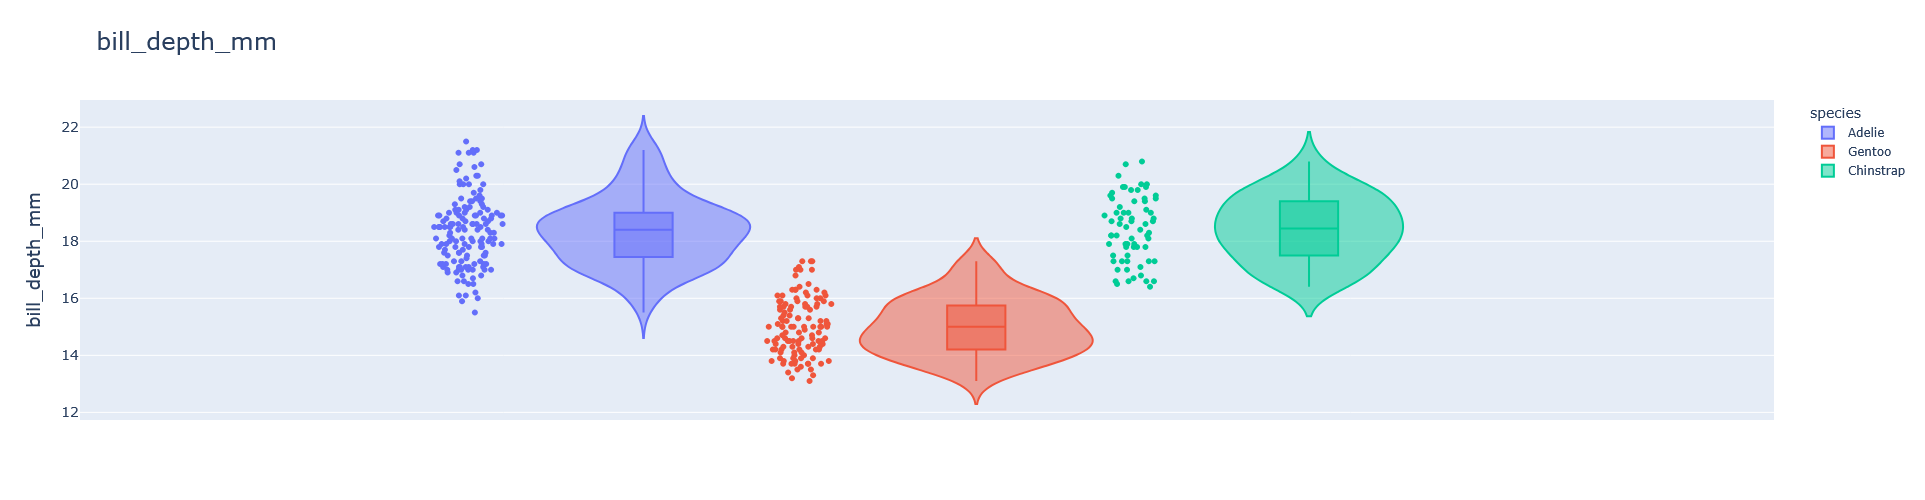

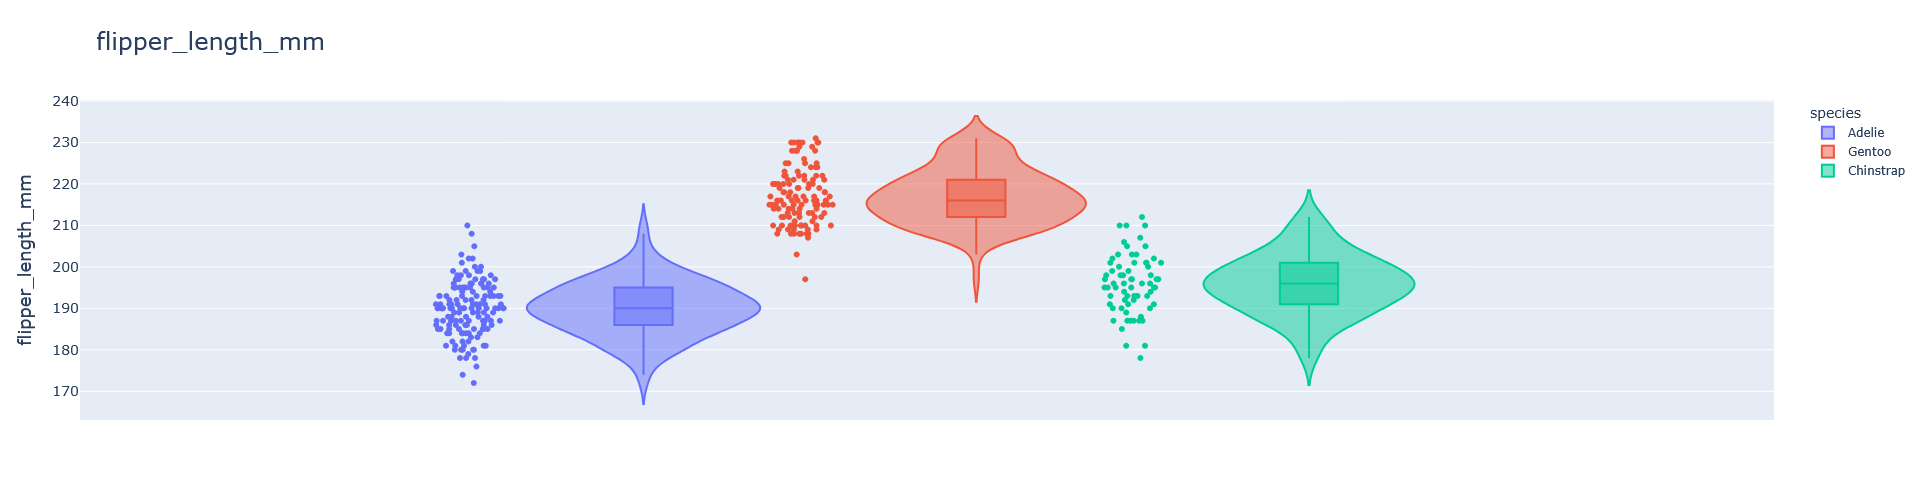

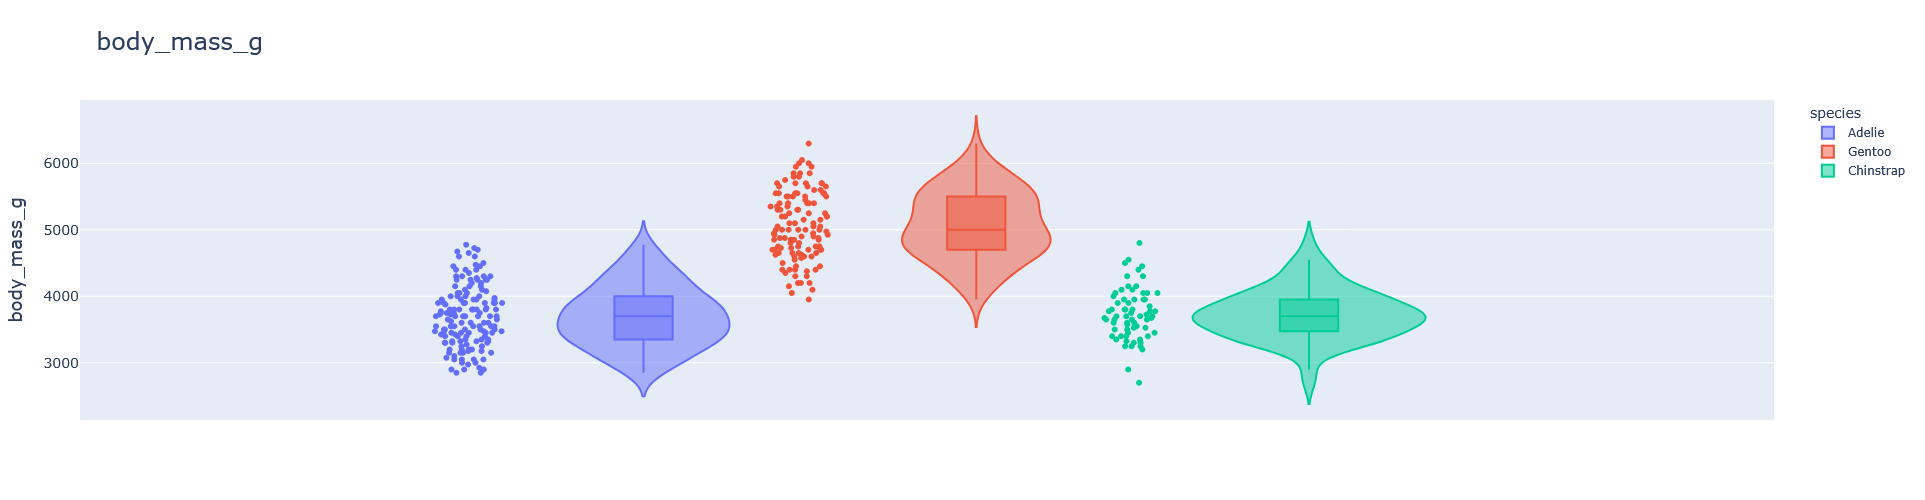

In [443]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column in numerical_columns:
    fig = px.violin(df, 
                    y=column, 
                    color='species',  
                    box=True,         
                    points='all',      
                    title=f'{column}',
                    labels={column: column}
                   )
    
    fig.update_layout(
        title_font_size=24,
        xaxis_title_font_size=18,
        yaxis_title_font_size=18,
        xaxis_tickfont_size=14,
        yaxis_tickfont_size=14,
        width=700,
        height=500,
    )
    
    fig.show()

In [444]:
df['year'].value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

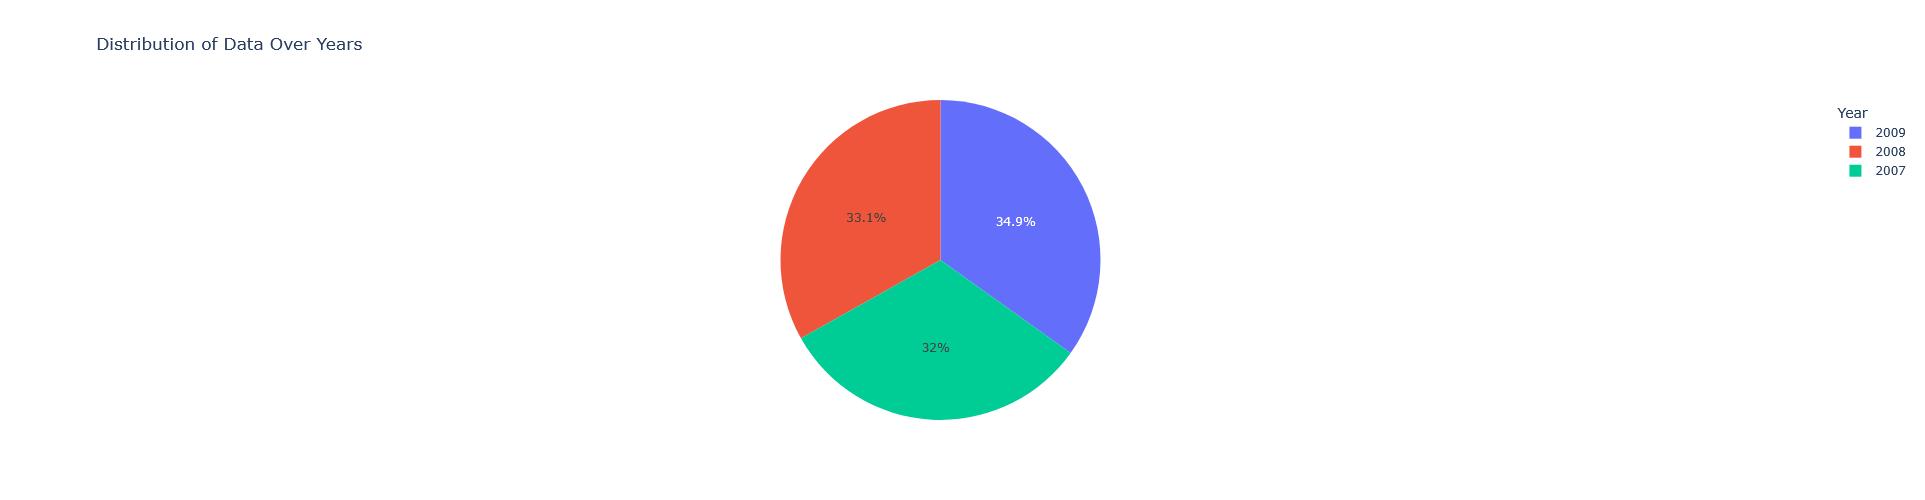

In [447]:
year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

fig = px.pie(
    year_counts,
    names='year',  
    values='count', 
    title='Distribution of Data Over Years',
    color='year',  
    height=500,  
    width=800  
)

fig.update_layout(
    legend_title='Year'
)

fig.show()

6. Двумерный анализ

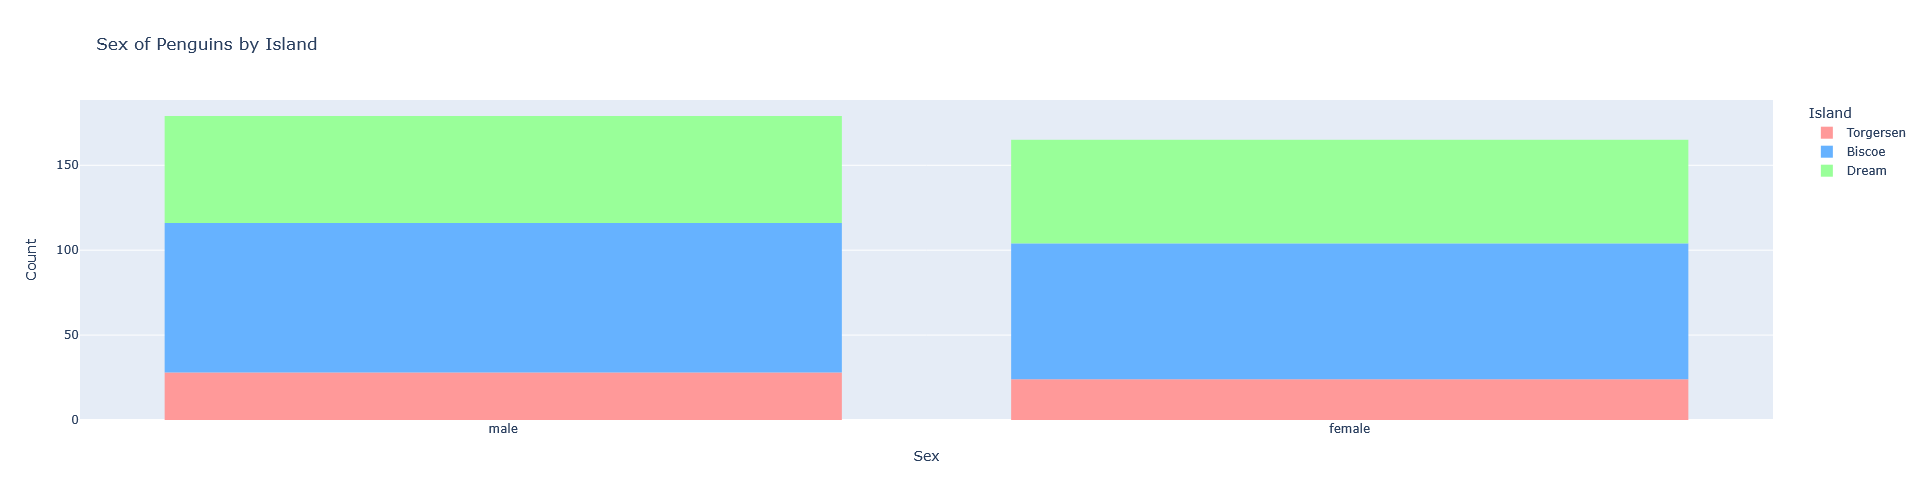

In [450]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99'] 

fig = px.histogram(
    df,
    x='sex',
    color='island',
    color_discrete_sequence=custom_colors,  
    title='Sex of Penguins by Island',
    labels={'sex': 'Sex', 'island': 'Island'},
    height=500,  
    width=800   
)

fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Count',
    legend_title='Island'
)

fig.show()

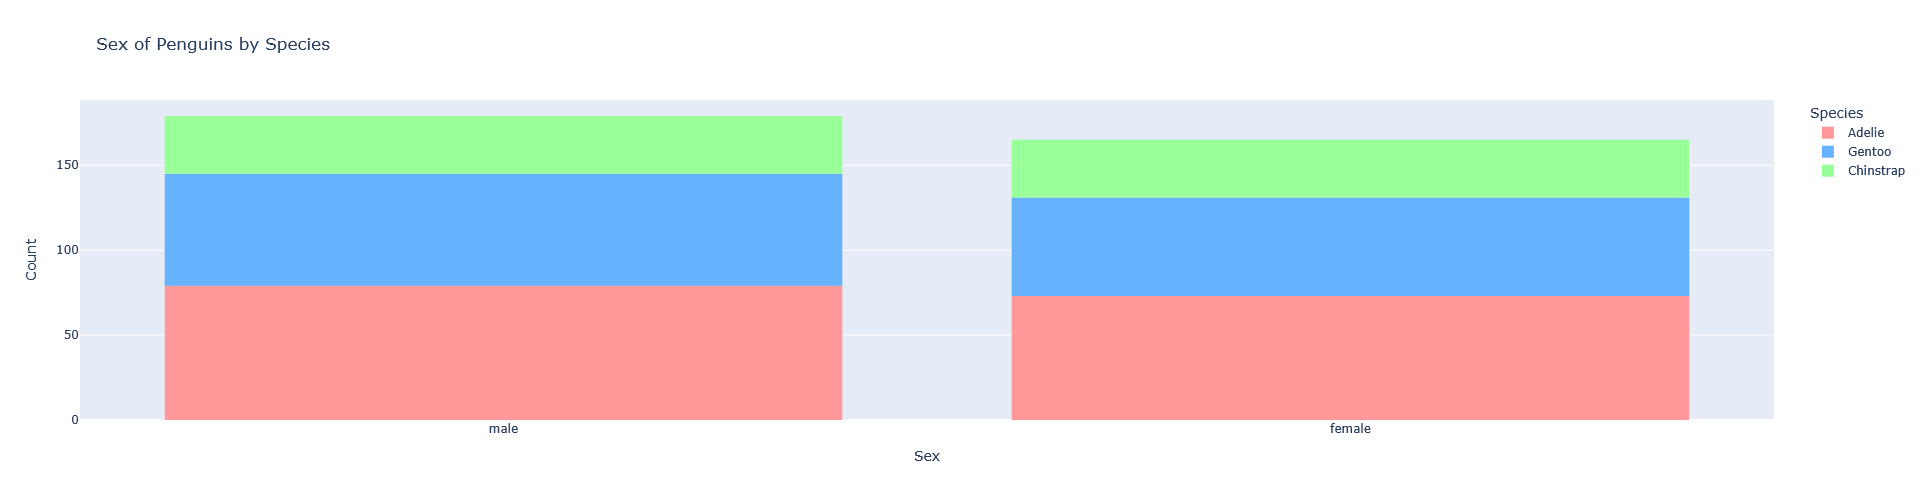

In [452]:


custom_colors = ['#FF9999', '#66B2FF', '#99FF99'] 

fig = px.histogram(
    df,
    x='sex',
    color='species',
    color_discrete_sequence=custom_colors,  
    title='Sex of Penguins by Species',
    labels={'sex': 'Sex', 'species': 'Species'},
    height=500,  
    width=800   
)

fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Count',
    legend_title='Species'
)

fig.show()



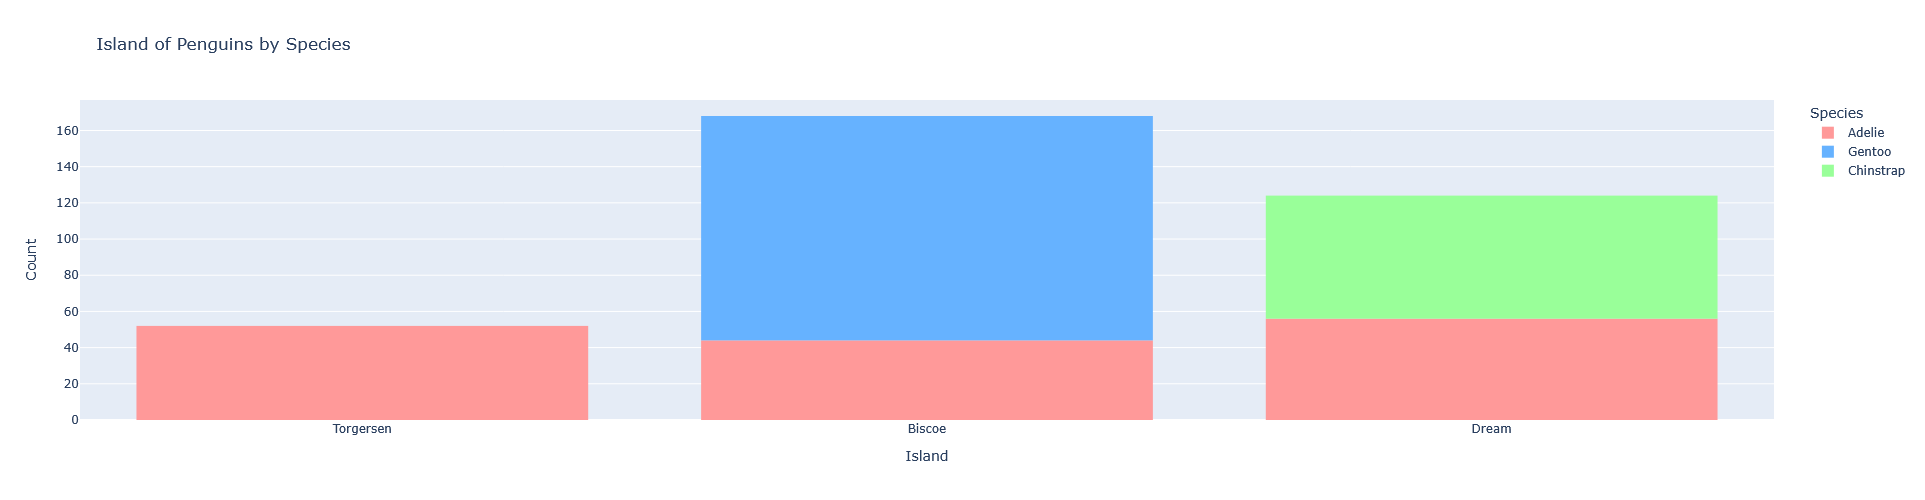

In [454]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99'] 

fig = px.histogram(
    df,
    x='island',
    color='species',
    color_discrete_sequence=custom_colors,  
    title='Island of Penguins by Species',
    labels={'island': 'Island', 'species': 'Species'},
    height=500,  
    width=800   
)

fig.update_layout(
    xaxis_title='Island',
    yaxis_title='Count',
    legend_title='Species'
)

fig.show()

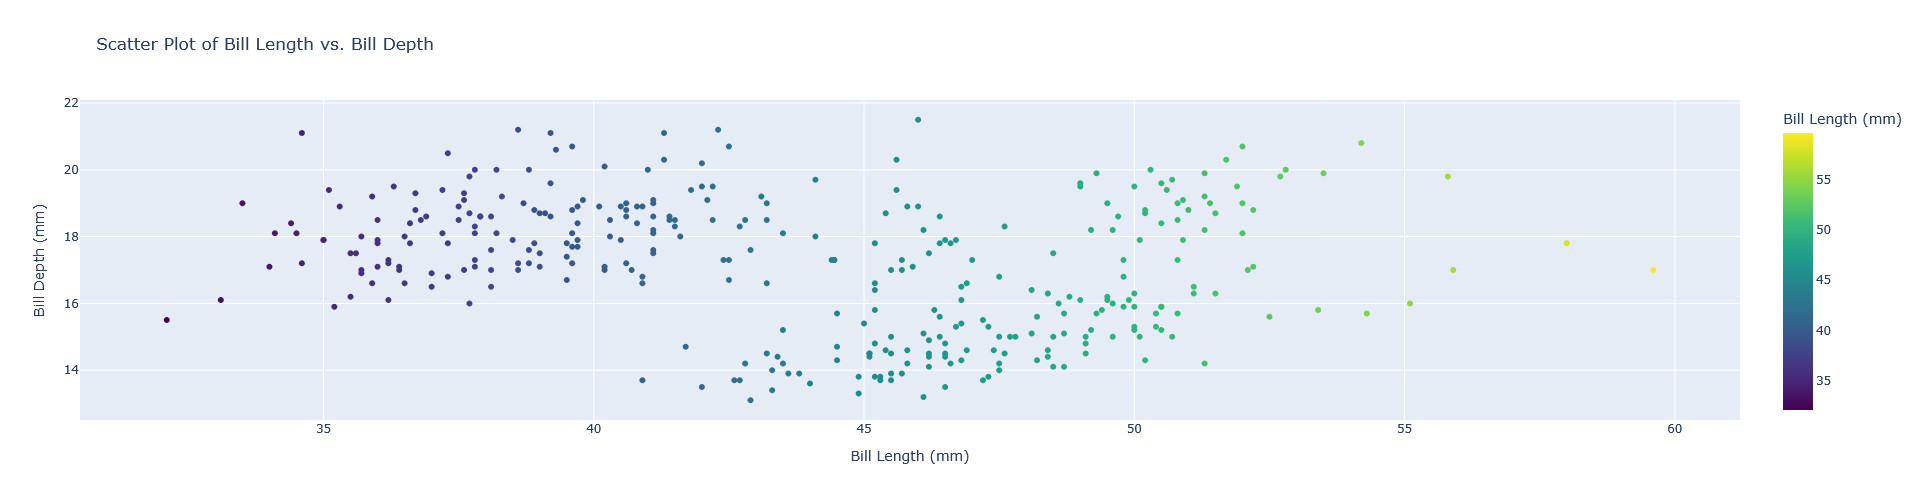

In [456]:


fig = px.scatter(
    df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color='bill_length_mm',  
    color_continuous_scale='Viridis',  
    title='Scatter Plot of Bill Length vs. Bill Depth',
    labels={'bill_length_mm': 'Bill Length (mm)', 'bill_depth_mm': 'Bill Depth (mm)'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Bill Length (mm)',
    yaxis_title='Bill Depth (mm)',
    coloraxis_colorbar=dict(title='Bill Length (mm)')
)

fig.show()



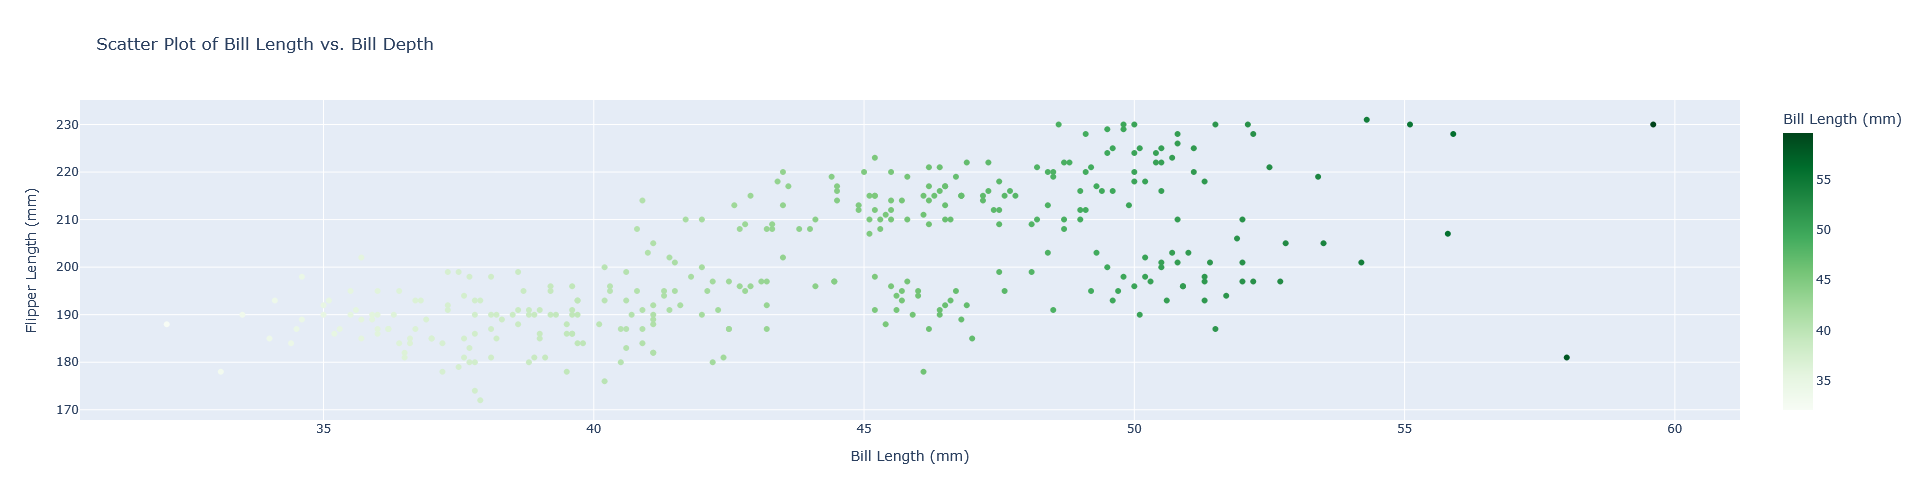

In [458]:
fig = px.scatter(
    df,
    x='bill_length_mm',
    y='flipper_length_mm',
    color='bill_length_mm',  
    color_continuous_scale='Greens',  
    title='Scatter Plot of Bill Length vs. Bill Depth',
    labels={'bill_length_mm': 'Bill Length (mm)', 'flipper_length_mm': 'Flipper Length (mm)'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Bill Length (mm)',
    yaxis_title='Flipper Length (mm)',
    coloraxis_colorbar=dict(title='Bill Length (mm)')
)

fig.show()

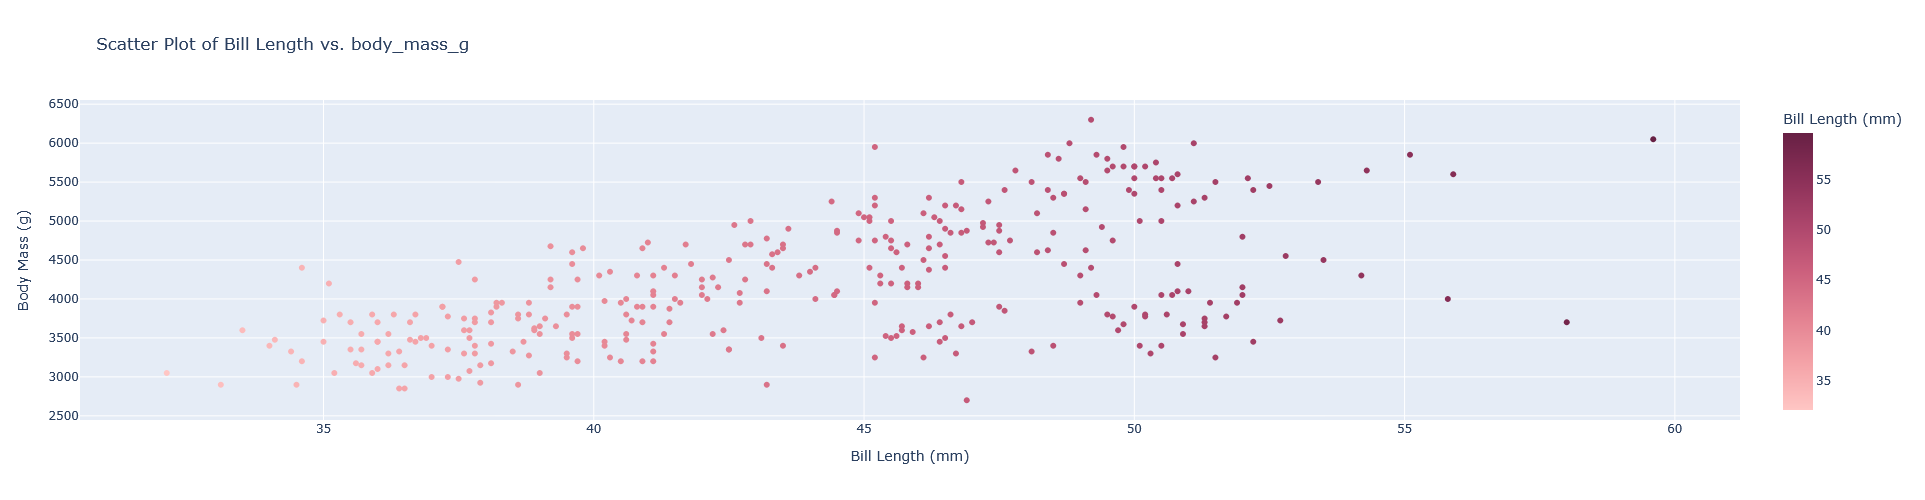

In [460]:
fig = px.scatter(
    df,
    x='bill_length_mm',
    y='body_mass_g',
    color='bill_length_mm',  
    color_continuous_scale='Burg',  
    title='Scatter Plot of Bill Length vs. body_mass_g',
    labels={'bill_length_mm': 'Bill Length (mm)', 'body_mass_g': 'Body Mass (g)'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Bill Length (mm)',
    yaxis_title='Body Mass (g)',
    coloraxis_colorbar=dict(title='Bill Length (mm)')
)

fig.show()

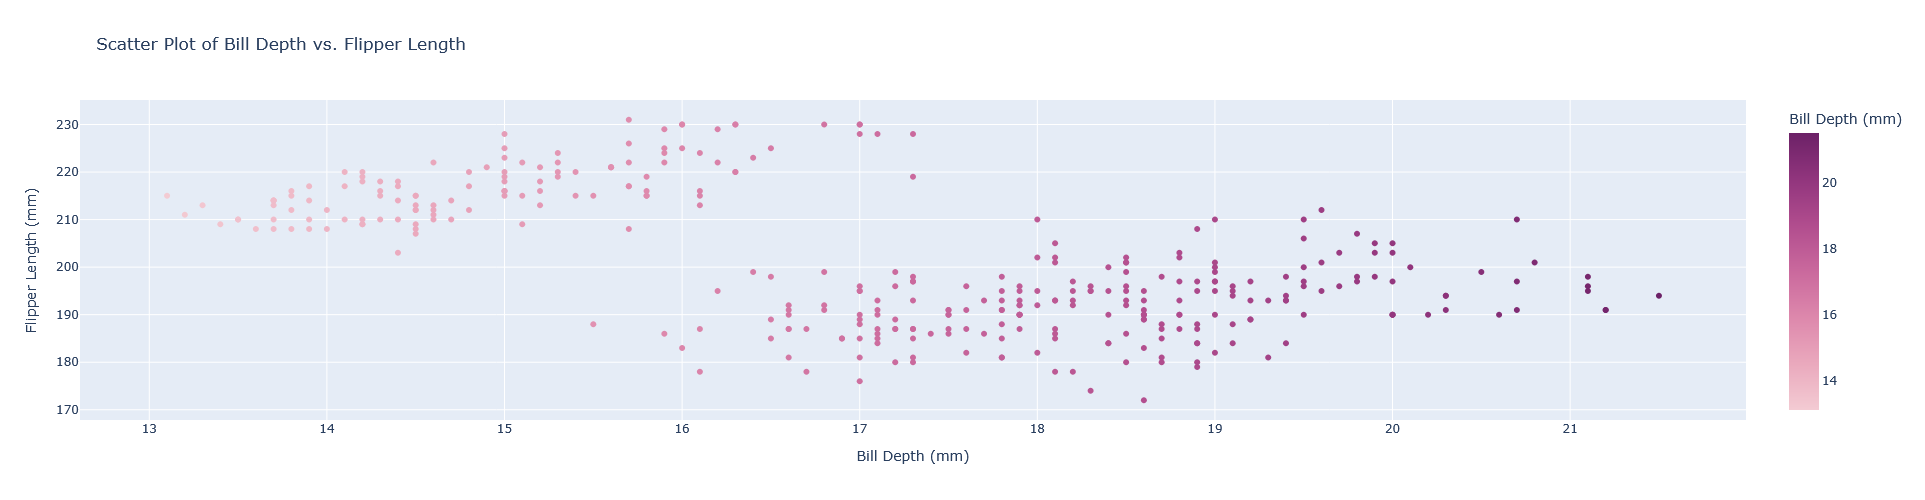

In [462]:
fig = px.scatter(
    df,
    x='bill_depth_mm',
    y='flipper_length_mm',
    color='bill_depth_mm',  
    color_continuous_scale='Magenta',  
    title='Scatter Plot of Bill Depth vs. Flipper Length',
    labels={'bill_depth_mm': 'Bill Depth (mm)', 'flipper_length_mm': 'Flipper Length (mm)'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Bill Depth (mm)',
    yaxis_title='Flipper Length (mm)',
    coloraxis_colorbar=dict(title='Bill Depth (mm)')
)

fig.show()

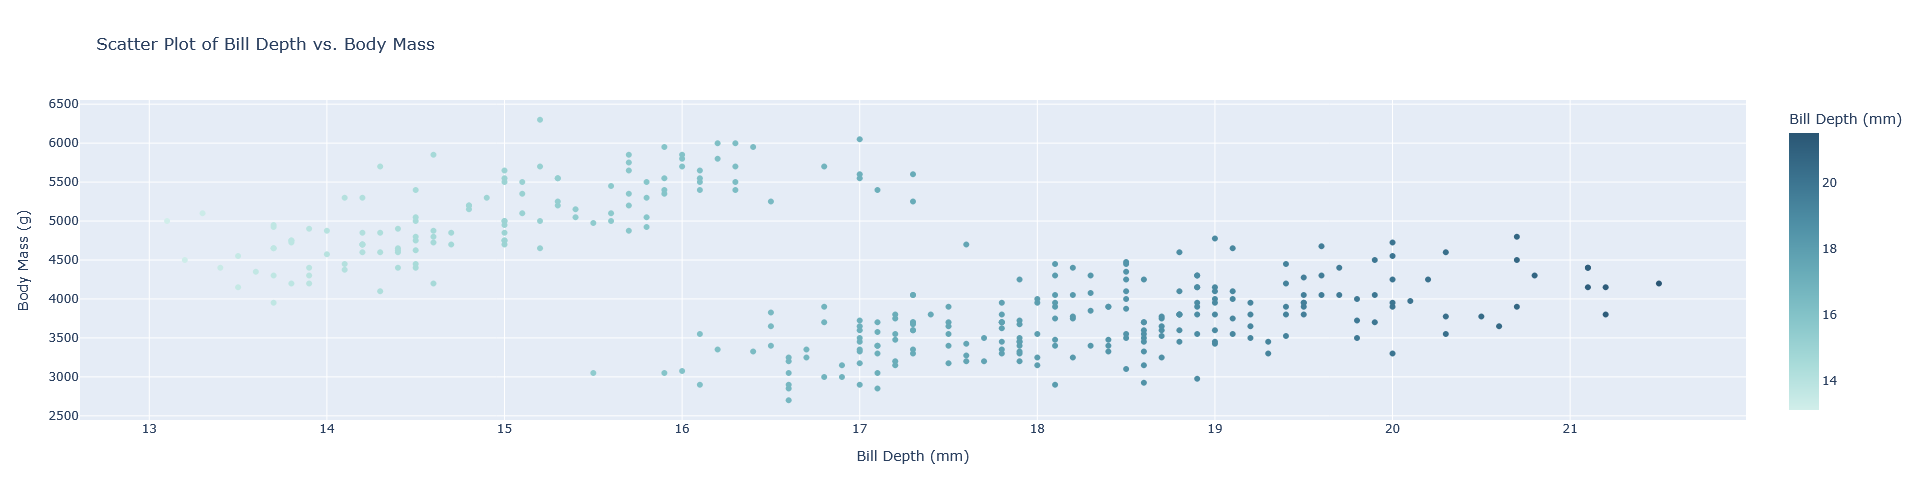

In [464]:
fig = px.scatter(
    df,
    x='bill_depth_mm',
    y='body_mass_g',
    color='bill_depth_mm',  
    color_continuous_scale='Teal',  
    title='Scatter Plot of Bill Depth vs. Body Mass',
    labels={'bill_depth_mm': 'Bill Depth (mm)', 'body_mass_g': 'Body Mass (g)'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Bill Depth (mm)',
    yaxis_title='Body Mass (g)',
    coloraxis_colorbar=dict(title='Bill Depth (mm)')
)

fig.show()



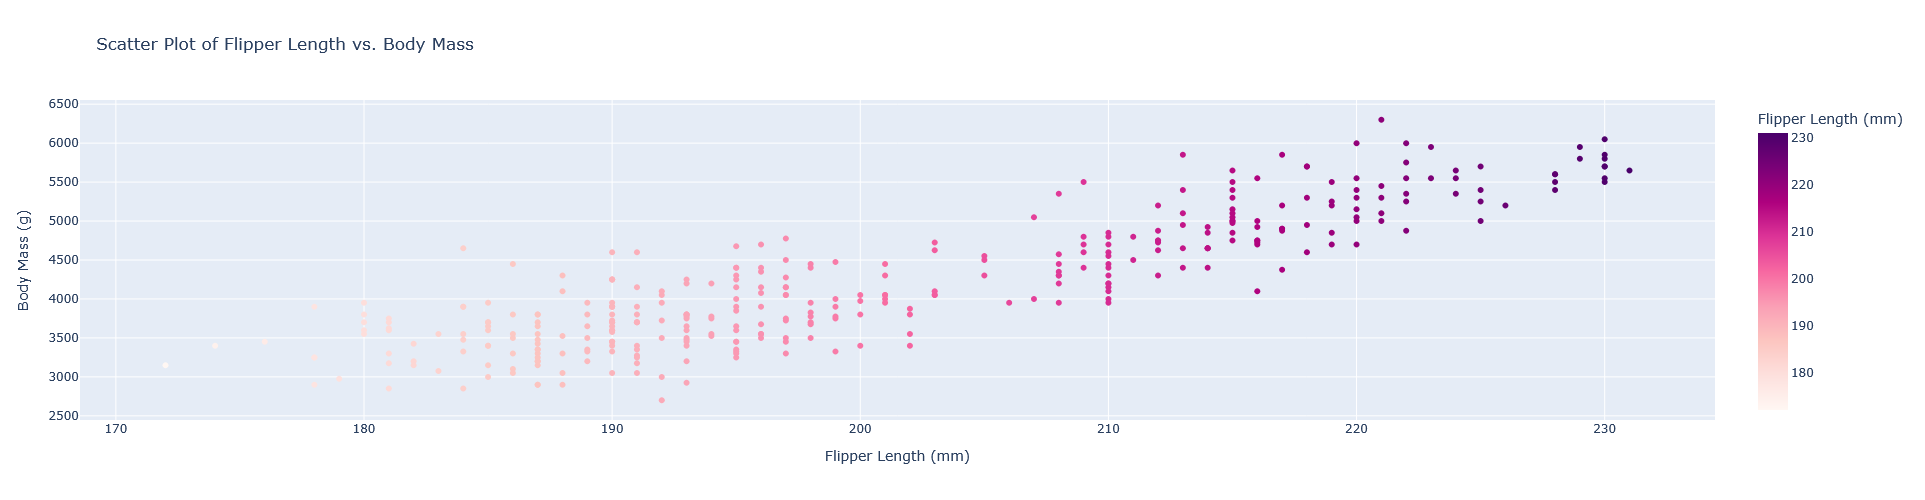

In [466]:
fig = px.scatter(
    df,
    x='flipper_length_mm',  
    y='body_mass_g',        
    color='flipper_length_mm',  
    color_continuous_scale='RdPu', 
    title='Scatter Plot of Flipper Length vs. Body Mass',
    labels={'flipper_length_mm': 'Flipper Length (mm)', 'body_mass_g': 'Body Mass (g)'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Body Mass (g)',
    coloraxis_colorbar=dict(title='Flipper Length (mm)')
)

fig.show()

7. Матрица графиков

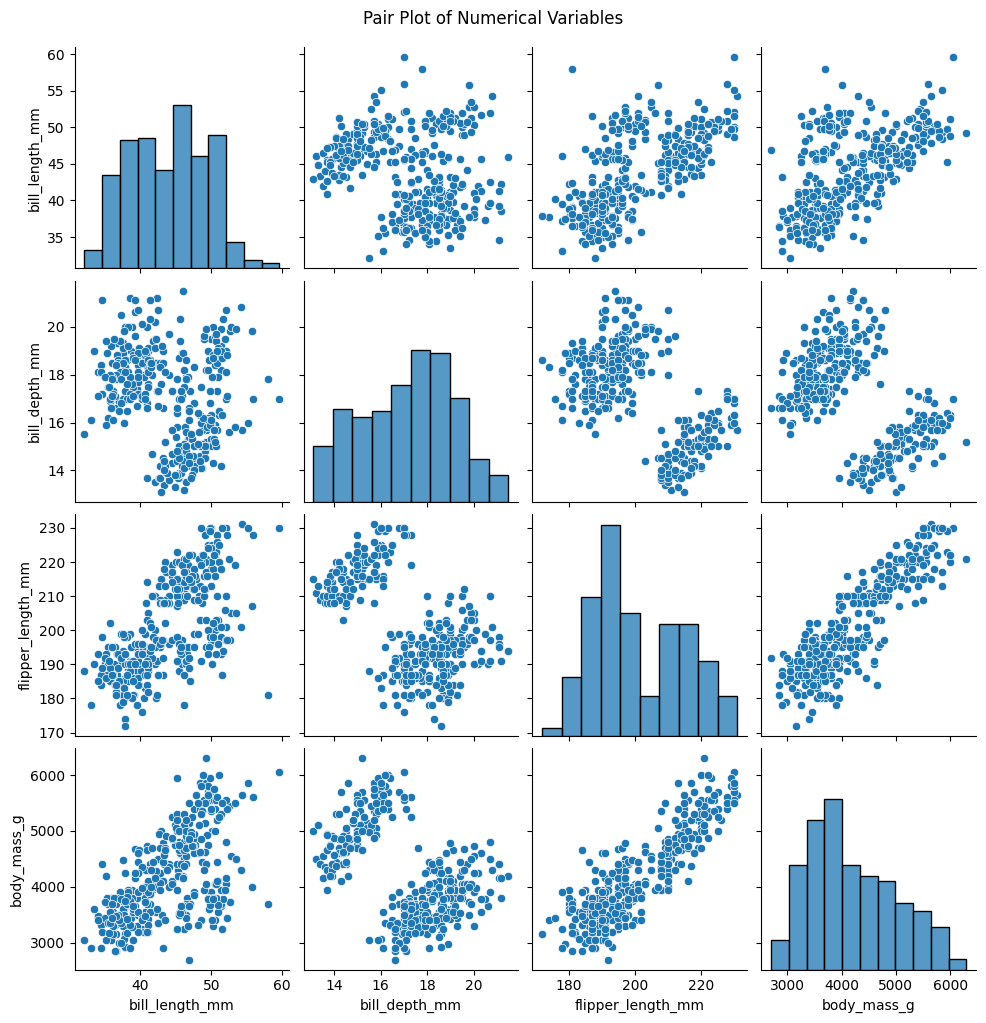

In [469]:
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data_subset = df[numerical_cols]

sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) 

plt.show()

8. Преобразование объектов

In [471]:
df['bill_size_mm'] = (df['bill_length_mm'] * df['bill_depth_mm']).round(2)
df['body_mass_index'] = (df['body_mass_g'] / df['flipper_length_mm']).round(2)
df['bill_length_to_depth'] = (df['bill_length_mm'] / df['bill_depth_mm']).round(2)
df['bill_length_mm_squared'] = (df['bill_length_mm'] ** 2).round(2)

In [474]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_size_mm,body_mass_index,bill_length_to_depth,bill_length_mm_squared
0,0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,male,2007,731.17,20.72,2.09,1528.81
1,1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,female,2007,687.30,20.43,2.27,1560.25
2,2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,female,2007,725.40,16.67,2.24,1624.09
3,3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,male,2007,768.99,20.56,2.57,1975.80
4,4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,female,2007,708.31,17.88,1.90,1346.89


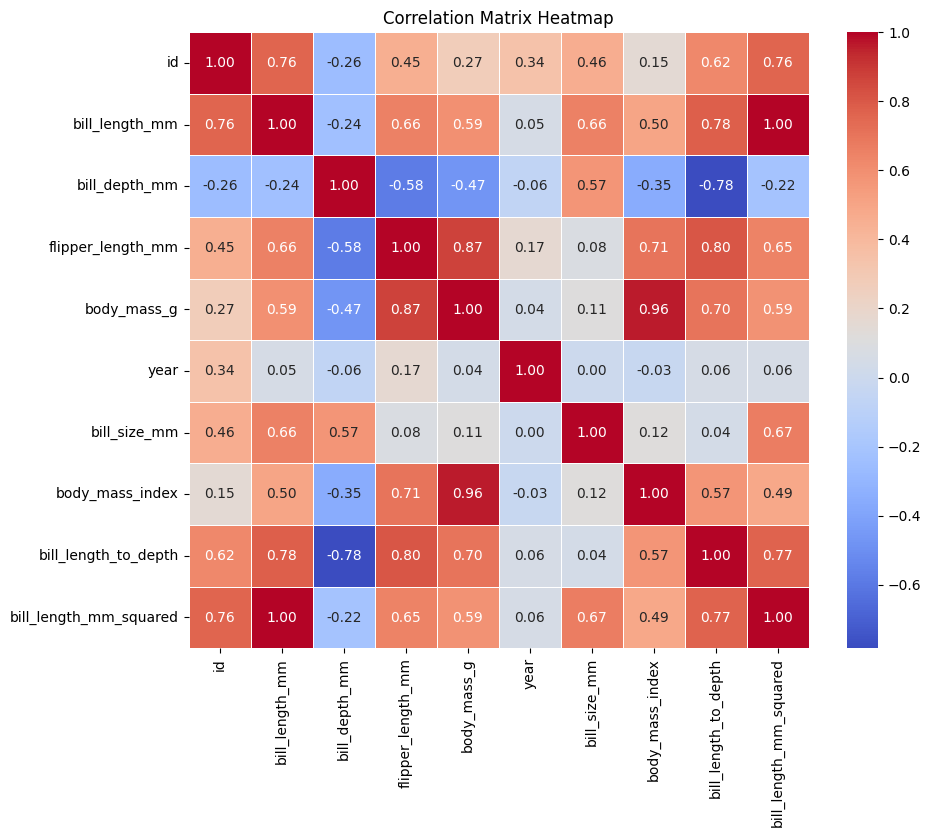

In [476]:
numerical_data = df.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



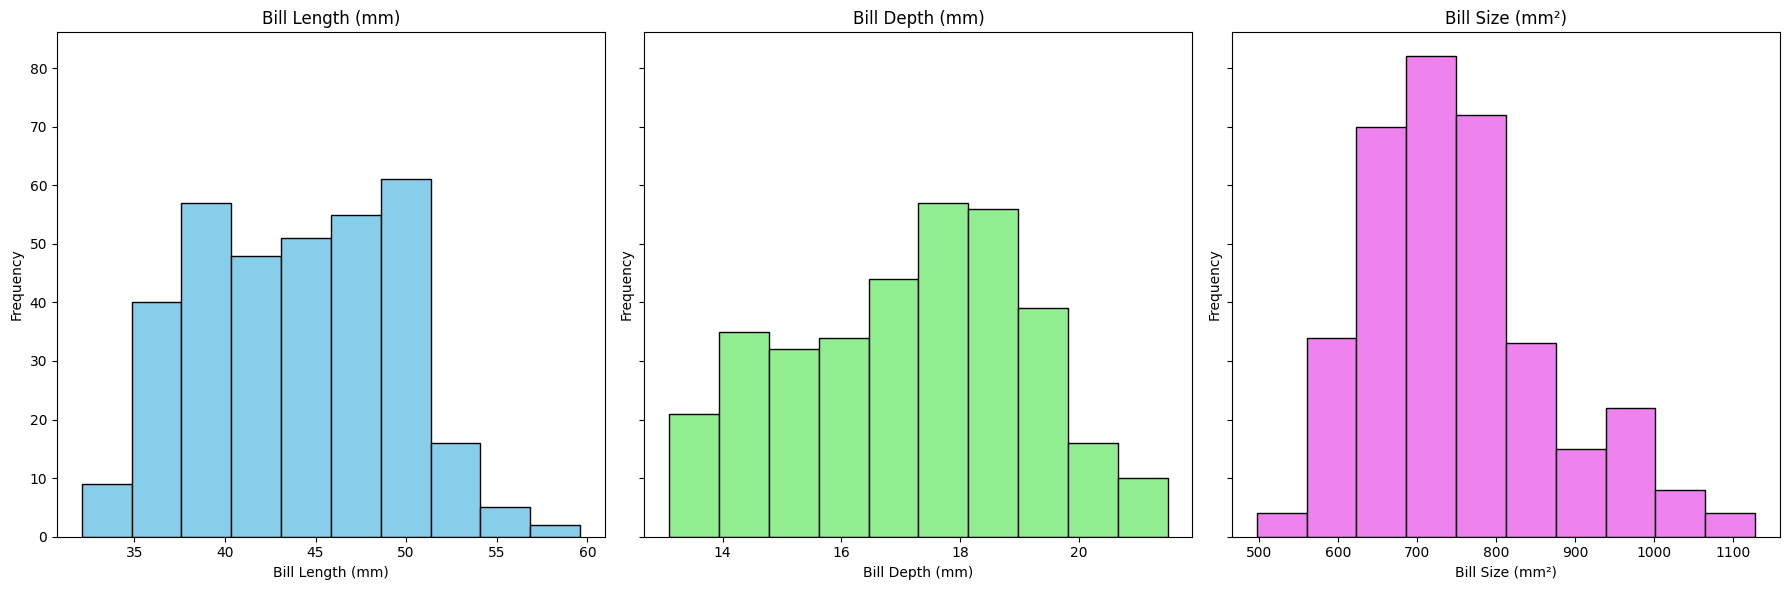

In [478]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axs[0].hist(df['bill_length_mm'], color='skyblue', edgecolor='black')
axs[0].set_title('Bill Length (mm)')
axs[0].set_xlabel('Bill Length (mm)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bill_depth_mm'], color='lightgreen', edgecolor='black')
axs[1].set_title('Bill Depth (mm)')
axs[1].set_xlabel('Bill Depth (mm)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['bill_size_mm'], color='violet', edgecolor='black')
axs[2].set_title('Bill Size (mm²)')
axs[2].set_xlabel('Bill Size (mm²)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



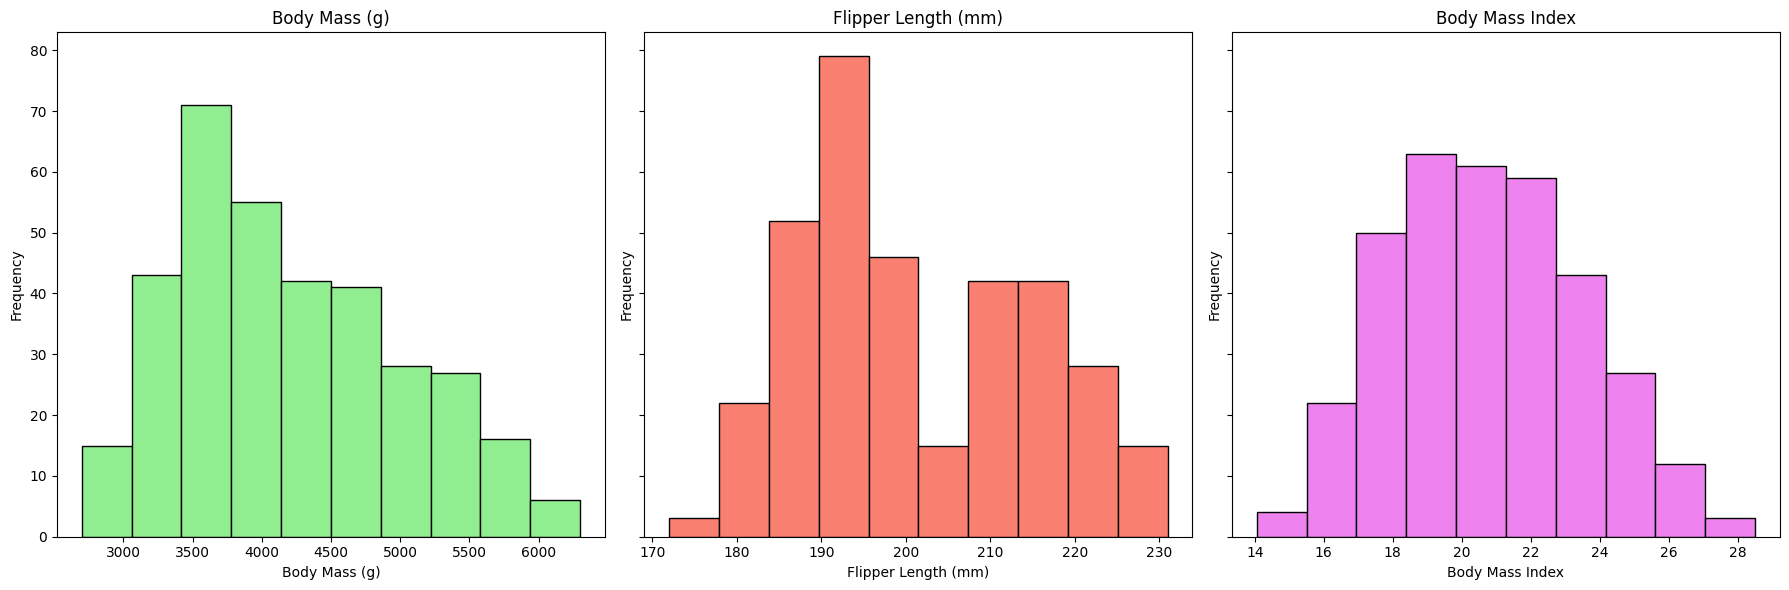

In [480]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axs[0].hist(df['body_mass_g'], color='lightgreen', edgecolor='black')
axs[0].set_title('Body Mass (g)')
axs[0].set_xlabel('Body Mass (g)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['flipper_length_mm'], color='salmon', edgecolor='black')
axs[1].set_title('Flipper Length (mm)')
axs[1].set_xlabel('Flipper Length (mm)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['body_mass_index'], color='violet', edgecolor='black')
axs[2].set_title('Body Mass Index')
axs[2].set_xlabel('Body Mass Index')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

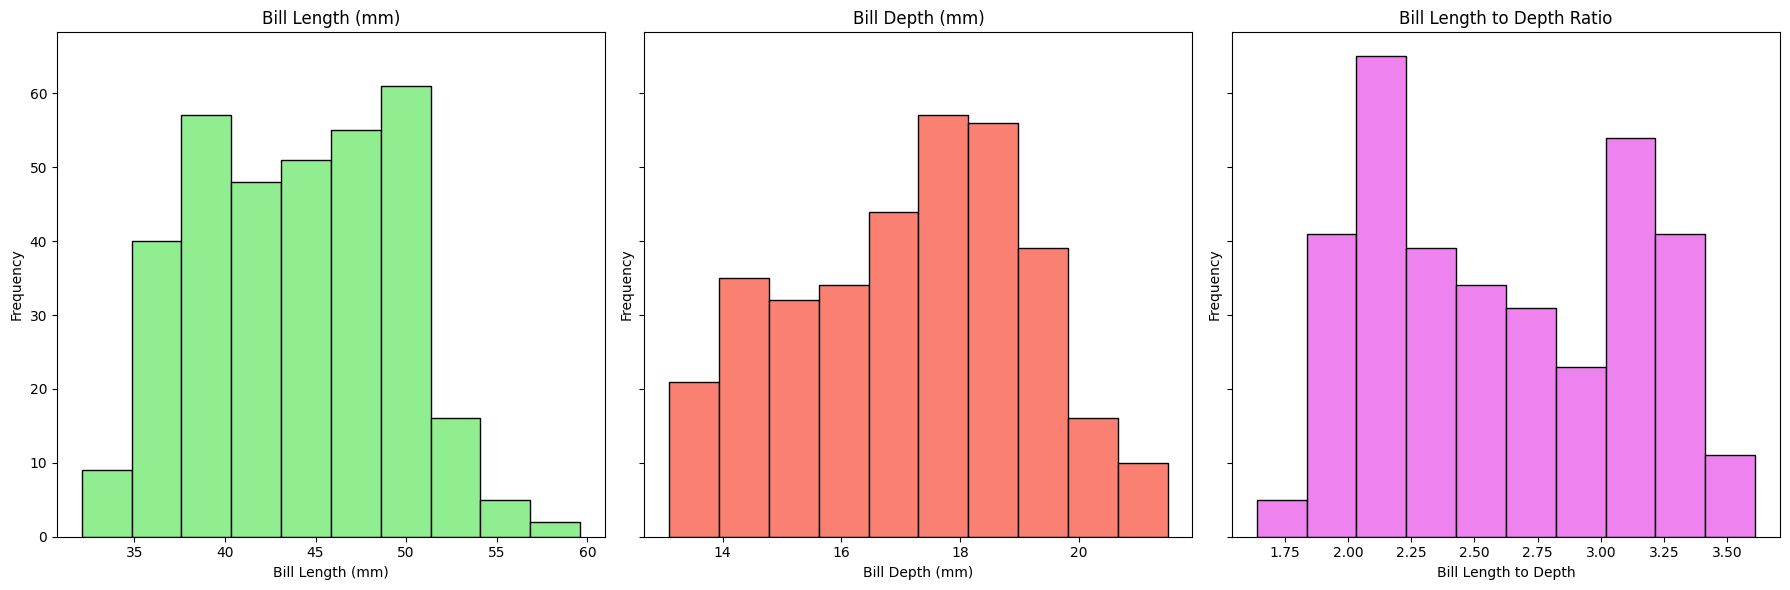

In [482]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axs[0].hist(df['bill_length_mm'], color='lightgreen', edgecolor='black')
axs[0].set_title('Bill Length (mm)')
axs[0].set_xlabel('Bill Length (mm)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bill_depth_mm'], color='salmon', edgecolor='black')
axs[1].set_title('Bill Depth (mm)')
axs[1].set_xlabel('Bill Depth (mm)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['bill_length_to_depth'], color='violet', edgecolor='black')
axs[2].set_title('Bill Length to Depth Ratio')
axs[2].set_xlabel('Bill Length to Depth')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



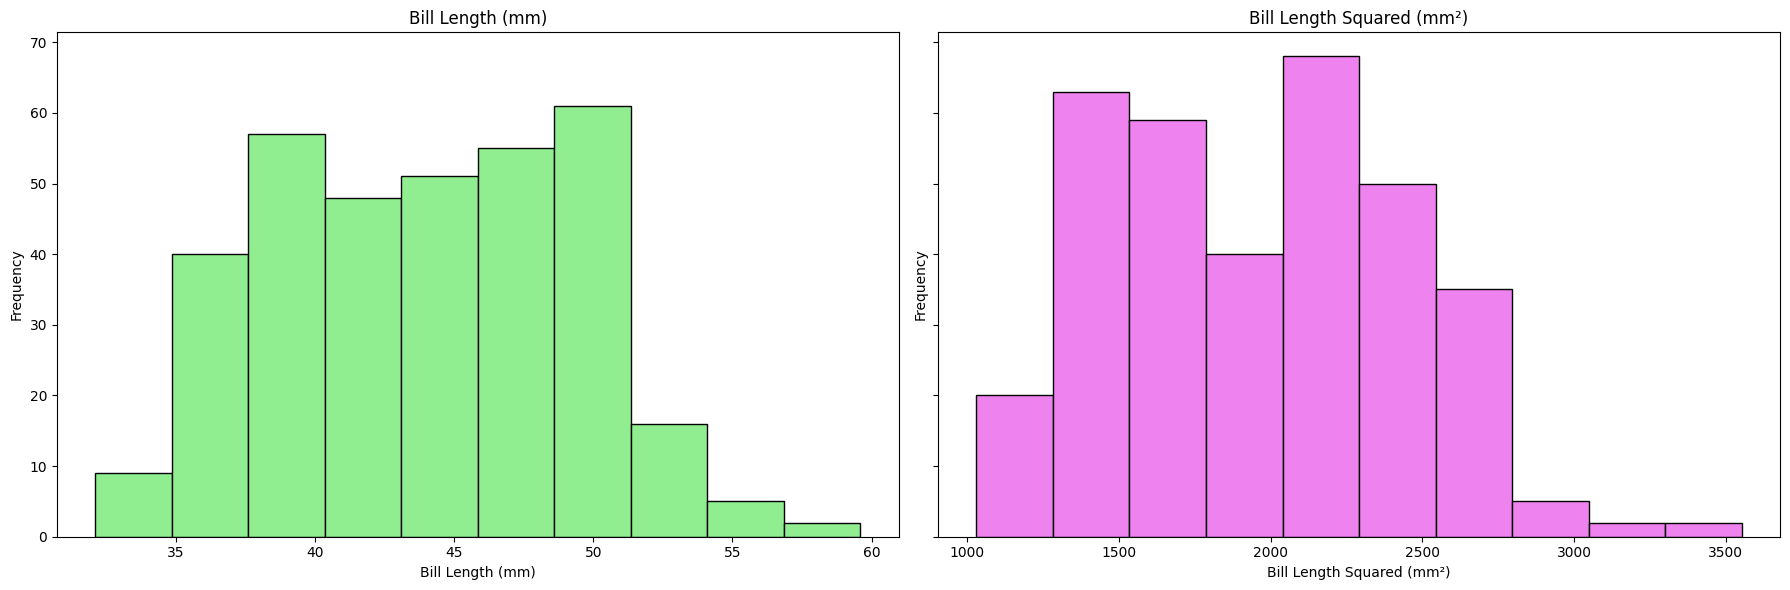

In [484]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

axs[0].hist(df['bill_length_mm'], color='lightgreen', edgecolor='black')
axs[0].set_title('Bill Length (mm)')
axs[0].set_xlabel('Bill Length (mm)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bill_length_mm_squared'], color='violet', edgecolor='black')
axs[1].set_title('Bill Length Squared (mm²)')
axs[1].set_xlabel('Bill Length Squared (mm²)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()